<a href="https://colab.research.google.com/github/NandhanaRameshkumar/Markov_Random_Field/blob/main/Markov_Random_Field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pgmpy.models import MarkovModel
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

# Define the Markov Random Field model
model = MarkovModel()

# Define the nodes
model.add_nodes_from(['A', 'B', 'C', 'D'])

# Define the edges (undirected)
model.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')])

# Define the factors
factor_ab = DiscreteFactor(['A', 'B'], cardinality=[2, 2], values=[30, 5, 1, 10])
factor_bc = DiscreteFactor(['B', 'C'], cardinality=[2, 2], values=[100, 1, 1, 100])
factor_cd = DiscreteFactor(['C', 'D'], cardinality=[2, 2], values=[1, 100, 100, 1])
factor_da = DiscreteFactor(['D', 'A'], cardinality=[2, 2], values=[100, 1, 1, 100])

# Add factors to the model
model.add_factors(factor_ab, factor_bc, factor_cd, factor_da)

# Perform inference using Belief Propagation
bp = BeliefPropagation(model)
# You can provide evidence here if needed using bp.map_query(variables=['A', 'B'], evidence={'C': 0})
result = bp.map_query()

print("Most probable state assignment:", result)


Most probable state assignment: {'A': 0, 'B': 1, 'C': 1, 'D': 0}


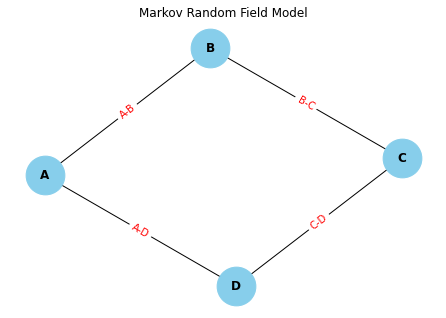

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import MarkovModel

# Define the Markov Random Field model
model = MarkovModel()

# Define the nodes
model.add_nodes_from(['A', 'B', 'C', 'D'])

# Define the edges (undirected)
model.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')])

# Create a directed graph from the model
graph = nx.Graph(model.edges())

# Draw the graph
pos = nx.spring_layout(graph)  # positions for all nodes
nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold', arrows=False)
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f"{u}-{v}" for u, v in model.edges()}, font_color='red')

plt.title("Markov Random Field Model")
plt.show()
